In [1]:
%pylab inline
from astropy.convolution import Tophat2DKernel,Gaussian2DKernel
#Notebook outputs normalized filter files for SExtractor

Populating the interactive namespace from numpy and matplotlib


/home/sean/anaconda3/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


(21, 21)


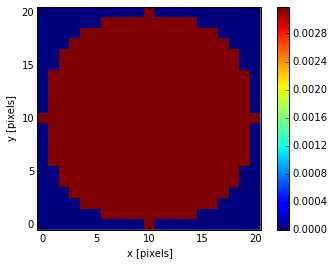

0.0


In [9]:
pix_rad = 10

tophat_2D_kernel = Tophat2DKernel(pix_rad)

int_array = np.array(tophat_2D_kernel)

print(int_array.shape)

full_array = np.zeros((len(int_array[0,:]),len(int_array[:,0])))

i = 0

while i < len(int_array):
    full_array[i,:] = int_array[i][:]
    i = i+1

normalization = 1./np.amax(int_array)

plt.imshow(tophat_2D_kernel, interpolation='none', origin='lower')
plt.xlabel('x [pixels]')
plt.ylabel('y [pixels]')
plt.colorbar()
plt.show()

print(full_array[1,1])

th = open("top_hat_"+str(pix_rad)+"pix"+".conv","w")

th.write("CONV NORM"+"\n")



for i in full_array:
    for j in i:
        th.write(str("{0:.8}".format(str(j*normalization))).ljust(8,"0") + " ")
    th.write("\n")
th.close()

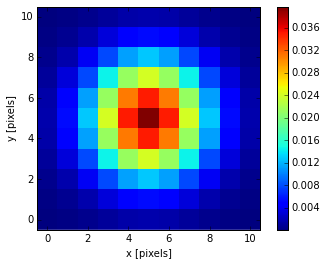

0.000728756116257
0.039788735773


In [8]:
filter_size = 11

FWHM = 2

gauss_2D_kernel = Gaussian2DKernel(FWHM,x_size = filter_size,y_size=filter_size)

int_array = np.array(gauss_2D_kernel)

full_array = np.zeros((len(int_array[0,:]),len(int_array[:,0])))

i = 0

while i < len(int_array):
    full_array[i,:] = int_array[i][:]
    i = i+1

normalization = 1./np.amax(int_array)    

plt.imshow(gauss_2D_kernel, interpolation='none', origin='lower')
plt.xlabel('x [pixels]')
plt.ylabel('y [pixels]')
plt.colorbar()
plt.show()

print(full_array[1,1])

gs = open("gauss_"+"FWHM"+str(FWHM)+"_dim"+str(filter_size)+".conv","w")

gs.write("CONV NORM"+"\n")



for i in full_array:
    for j in i:
        gs.write(str("{0:.8}".format(str(j*normalization))).ljust(8,"0") + " ")
    gs.write("\n")
gs.close()

print(np.amax(int_array))